In [1]:
import matplotlib

import matplotlib.pyplot as plt

%matplotlib inline

%config InlineBackend.figure_format='retina'



from importlib import reload

import numpy as np



from astropy.cosmology import FlatLambdaCDM

from astropy import units as u

from astropy.constants import c



from scipy.interpolate import UnivariateSpline

from scipy.interpolate import interpolate



from trgpy.config import cosmo_params

import trgpy.sed

reload(trgpy.sed)

from trgpy.sed import obs_to_restframe_sed, get_lum_from_sed, get_flux_from_sed, get_mBB_thick_radio


In [2]:
params = {'backend': 'ps',

'legend.fontsize': 18,

'xtick.labelsize': 29,

'ytick.labelsize': 29,

'font.family': 'serif',

'text.usetex': True,

'legend.numpoints': 1

}



matplotlib.rcParams.update(params)

[ 250.  350.  350.  450.  450.  500.  850.  850.  850. 1350.]


<ErrorbarContainer object of 3 artists>

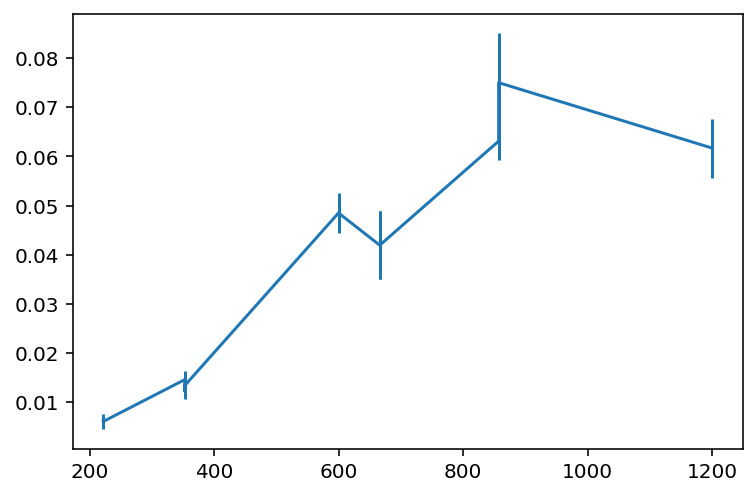

In [43]:
#data from SMMJ14011+0252
z_SMM=2.56

wav=np.array([250.,350.,350.,450.,450.,500.,850.,850.,850.,1350.])
print(wav)
wav=(1.E-9*3.E8/(wav*1.E-6))#*u.GHz
flx=np.array([61.7,75.,63.1,42.,41.9,48.5,13.4,12.3,14.6,6.1])
flx=flx/(10**3)
flx_err=np.array([6.,10.,3.8,7.0,6.9,4.0,1.4,1.7,1.8,1.5])
flx_err=flx_err/(10**3)
#print(len(flx))
plt.errorbar(wav,flx,flx_err)

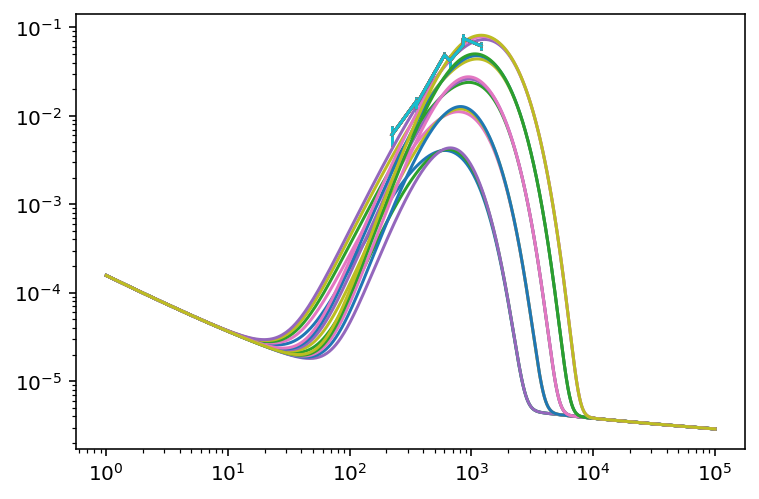

In [77]:
# Which wavelengths should be sampled?

lmd_o = np.array([250.,350.,450.,500.,850.,1100.]) # Wavelenghts [um]

# Generate SED model

Td = [30.,40.,50.,60.,70.] #dust temperature [K]

B = [1.,1.5,2.]# Beta value/slope 

SFR = 1550. # should be fixed - this might be an ok value. [M_sun/yr]

z = [2.56]#[1.,2.5,3.5,4.5,6.] # here we need an array

z_save=[None]*np.size(Td)*np.size(B)*np.size(SFR)*np.size(z)
Td_save=[None]*np.size(Td)*np.size(B)*np.size(SFR)*np.size(z)
B_save=[None]*np.size(Td)*np.size(B)*np.size(SFR)*np.size(z)
save_name=[None]*np.size(Td)*np.size(B)*np.size(SFR)*np.size(z)
g=0

for k in range(0,len(Td)):
    for q in range(0,len(B)):
        for w in range(0,len(z)):
            z_save[g]=z[w]
            Td_save[g]=Td[k]
            B_save[g]=B[q]
            frq_o, frq_r, flux_radio, flux_mm, flux = get_mBB_thick_radio(z=z[w], SFR=SFR, Td=Td[k], beta=B[q]) # Can probably discard this line
            #print(max(flux_mm))
            plt.plot(frq_o,flux)
            plt.errorbar(wav,flx,flx_err)
            plt.xscale("log")
            plt.yscale("log")
            #exit()
            # Get fluxes at sampled wavelengths
            flux_lmd_o = get_flux_from_sed(frq_o, flux, (1.E-9*3.E8/(lmd_o*1.E-6))*u.GHz)
            flux_lmd_o = flux_lmd_o*1.E3 # [mJy]
            #print(flux_lmd_o)
            #Get rms noise and flux uncertainty
            rms_noise = flux_lmd_o*0.15 #scale of the noise is the same as the error. 15% of true value 
            eflux_lmd_o = rms_noise # Uncertainty
    
            for i in np.arange(0,len(flux_lmd_o)):
                # My attempt at adding noise
                flux_lmd_o[i] = np.random.normal(loc=flux_lmd_o[i], scale=rms_noise[i], size=None)
        

            # Save fluxes to file
            import os.path
            path = "C:/Users/blue/Desktop/Python/SynthSED"
            #file name gives info about SED
            name_of_file = "Td="+str(Td[k])+","+"Beta="+str(B[q])+","+"SFR="+str(SFR)+","+"z="+str(z[w])
            #print(name_of_file)
            save_name[g]=name_of_file
            g=g+1
            completeName = os.path.join(path, name_of_file+".txt")
            
            f = open(completeName, "w")
            #file is structures as wavelength
            for i in np.arange(0,len(lmd_o)):
                out = str(lmd_o[i]) + " " + str(flux_lmd_o[i]) + " " + str(eflux_lmd_o[i]) + "\n"
                f.write(out)
        
            f.close()

In [59]:
print(save_name)

['Td=30.0,Beta=1.0,SFR=1550.0,z=2.56', 'Td=30.0,Beta=1.5,SFR=1550.0,z=2.56', 'Td=30.0,Beta=2.0,SFR=1550.0,z=2.56', 'Td=40.0,Beta=1.0,SFR=1550.0,z=2.56', 'Td=40.0,Beta=1.5,SFR=1550.0,z=2.56', 'Td=40.0,Beta=2.0,SFR=1550.0,z=2.56', 'Td=50.0,Beta=1.0,SFR=1550.0,z=2.56', 'Td=50.0,Beta=1.5,SFR=1550.0,z=2.56', 'Td=50.0,Beta=2.0,SFR=1550.0,z=2.56', 'Td=60.0,Beta=1.0,SFR=1550.0,z=2.56', 'Td=60.0,Beta=1.5,SFR=1550.0,z=2.56', 'Td=60.0,Beta=2.0,SFR=1550.0,z=2.56', 'Td=70.0,Beta=1.0,SFR=1550.0,z=2.56', 'Td=70.0,Beta=1.5,SFR=1550.0,z=2.56', 'Td=70.0,Beta=2.0,SFR=1550.0,z=2.56']


[[2.50000000e+02 1.01300794e+00 2.08350234e-01]
 [3.50000000e+02 3.68912911e+00 4.77065598e-01]
 [4.50000000e+02 3.96749349e+00 5.98537771e-01]
 [5.00000000e+02 3.28047926e+00 6.09028734e-01]
 [8.50000000e+02 2.92225865e+00 4.02399522e-01]
 [1.10000000e+03 2.40820397e+00 2.65985125e-01]]


Text(0.5, 1.0, 'Td=30.0,Beta=1.0,SFR=1550.0,z=2.56')

<Figure size 432x288 with 0 Axes>

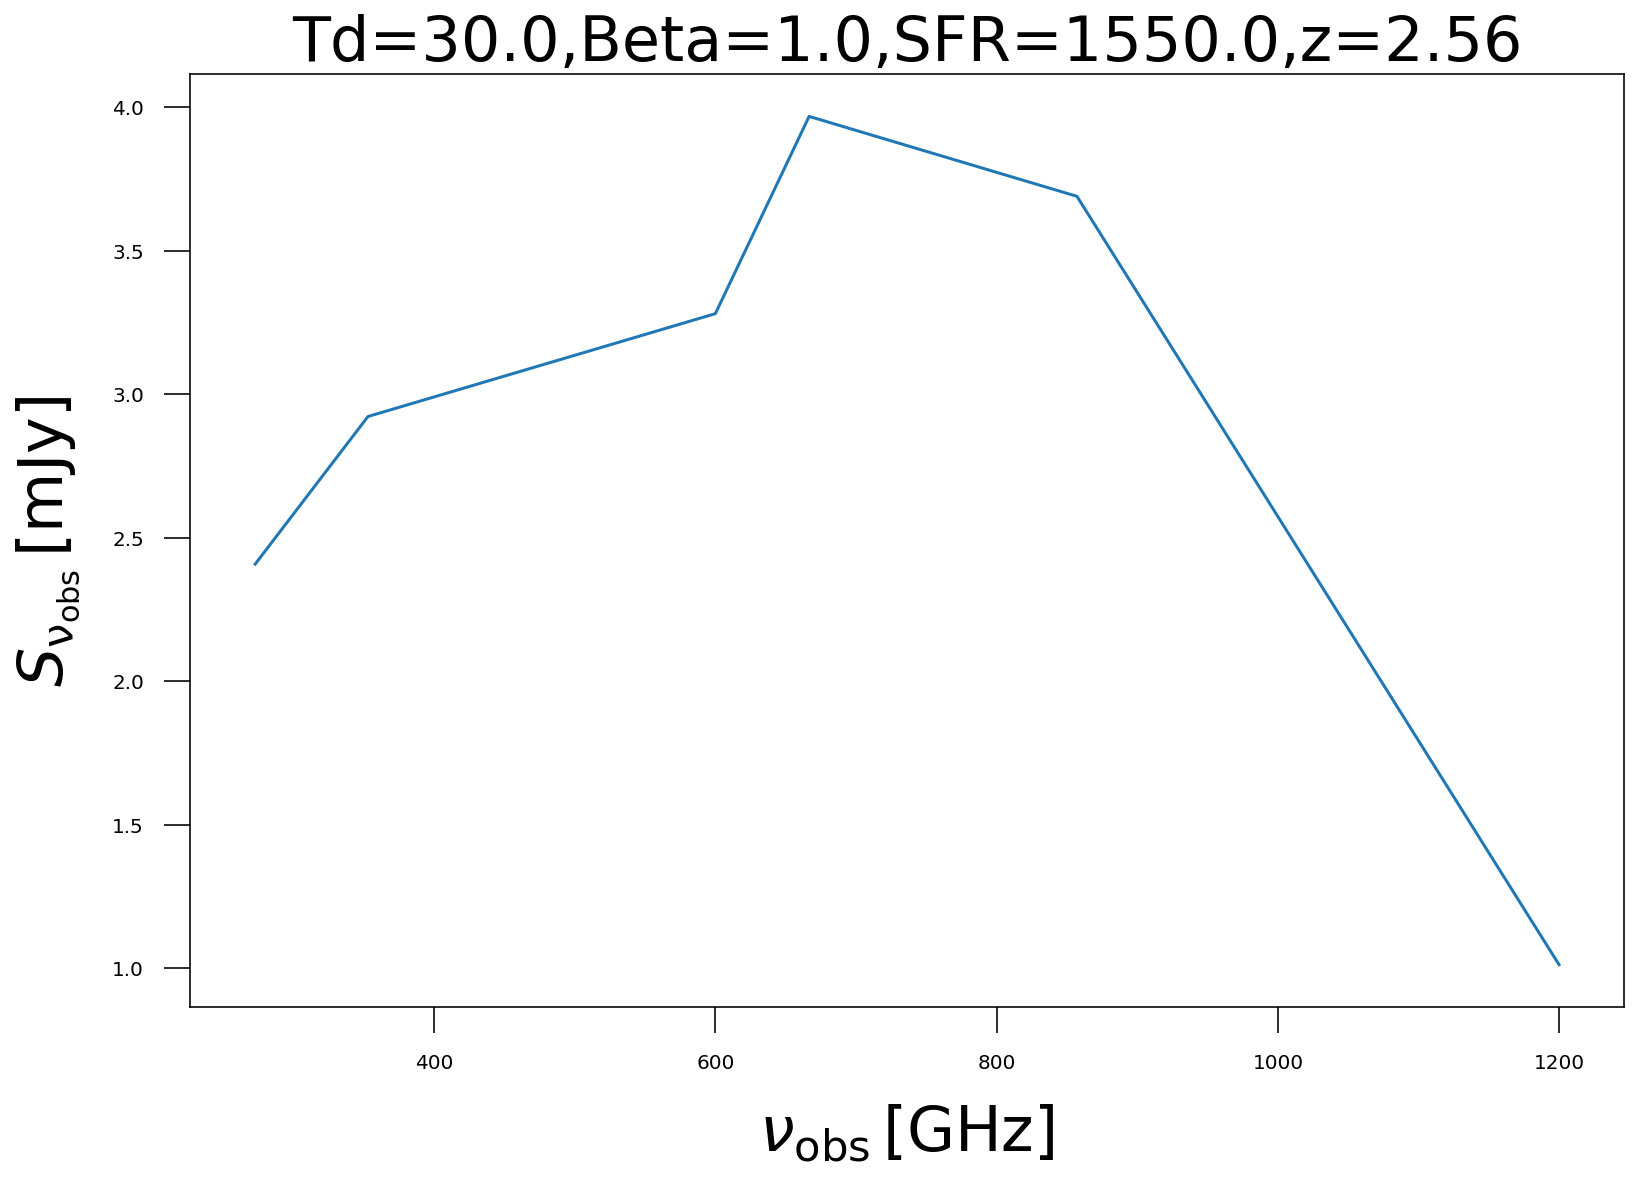

In [57]:
#Plot figures and save them as .png 
f = open(os.path.join(path,save_name[0]+".txt"), "r")
data=f.read().split()
f.close()
for i in range(0,len(data)):
    data[i]=float(data[i])
#print(data)
data=np.reshape(data,(int(len(data)/3),3))
#data[i]=data
print(data)


#plot SED
fig = plt.figure()
fig, axes = plt.subplots(nrows=1, ncols=1)
plt.subplots_adjust(left=0.15, right=0.98, top=0.98, bottom=0.17)
fig.set_size_inches(12, 8)

axes.tick_params(which='minor', length=8)
axes.tick_params(which='major', length=13)
axes.tick_params(axis='x', pad=10)
axes.tick_params(axis='y', pad=10)

#axes.set_xlim(0.5, 5.0E3)
#axes.set_ylim(6.E-1,50.)
#plt.xscale("log")
#plt.yscale("log")
axes.set_xlabel(r'$\nu_{\rm obs}\,{\rm [GHz]}$', fontsize=31, labelpad=15)
axes.set_ylabel(r'$S_{\rm \nu_{\rm obs}}\,{\rm [mJy]}$', fontsize=31, labelpad=15)

#plt.errorbar(data[:,0]*299792.458,data[:,1],data[:,2])
plt.plot((1.E-9*3.E8/(data[:,0]*1.E-6))*u.GHz,data[:,1])
plt.title(save_name[0],fontsize=31)

# Create plots from IDL results 

In [60]:
z_out=np.zeros(len(save_name))
CI_upper=np.zeros(len(save_name))
CI_lower=np.zeros(len(save_name))
import os.path
path = r"C:\Users\blue\Desktop\Python\SynthSEDresult"

for i in range(0,len(save_name)):
    f = open(os.path.join(path,"out_"+save_name[i]+".txt"), "r")
    all_lines = f.readlines()#read all lines
    z_out[i]=float(all_lines[11].split()[-1])#mode redshift
    CI_upper[i]=float(all_lines[12].split()[-1])#upper 68% min credible interval 
    CI_lower[i]=float(all_lines[13].split()[-1])#lower 68% min cedible interval
    #print(z_out)
    #print(CI_upper)
    #print(CI_lower)
    f.close()

[4.325 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.   ]
[5.29793 0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.     ]
[3.375 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.   ]
[4.325 3.475 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.   ]
[5.29793 4.21676 0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.     ]
[3.375 2.875 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.   ]
[4.325 3.475 3.525 0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.   ]
[5.29793 4.21676 4.40686 0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.     ]
[3.375 2.875 2.825 0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.   ]
[4.325 3.475 3.525 3.325 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.   ]
[5.29793 4.21676

In [5]:
#No noise results
z_nonoiseout=np.zeros(len(save_name))
CI_nonoiseupper=np.zeros(len(save_name))
CI_nonoiselower=np.zeros(len(save_name))
import os.path
path = r"C:\Users\blue\Desktop\Python\SynthSEDnonoiseresult"

for i in range(0,len(save_name)):
    f = open(os.path.join(path,"nonoiseout_"+save_name[i]+".txt"), "r")
    all_lines = f.readlines()#read all lines
    z_nonoiseout[i]=float(all_lines[11].split()[-1])#mode redshift
    CI_nonoiseupper[i]=float(all_lines[12].split()[-1])#upper 68% min credible interval 
    CI_nonoiselower[i]=float(all_lines[13].split()[-1])#lower 68% min cedible interval
    #print(z_nonoiseout)
    #print(CI_nonoiseupper)
    #print(CI_nonoiselower)
    f.close()

[2.575 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
[2.89605 0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.     ]
[2.175 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
[2.575 3.725 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0. 

Text(0.5, 1.0, 'Td=30.0,Beta=1.0,SFR=1550.0,z=2.56')

<Figure size 432x288 with 0 Axes>

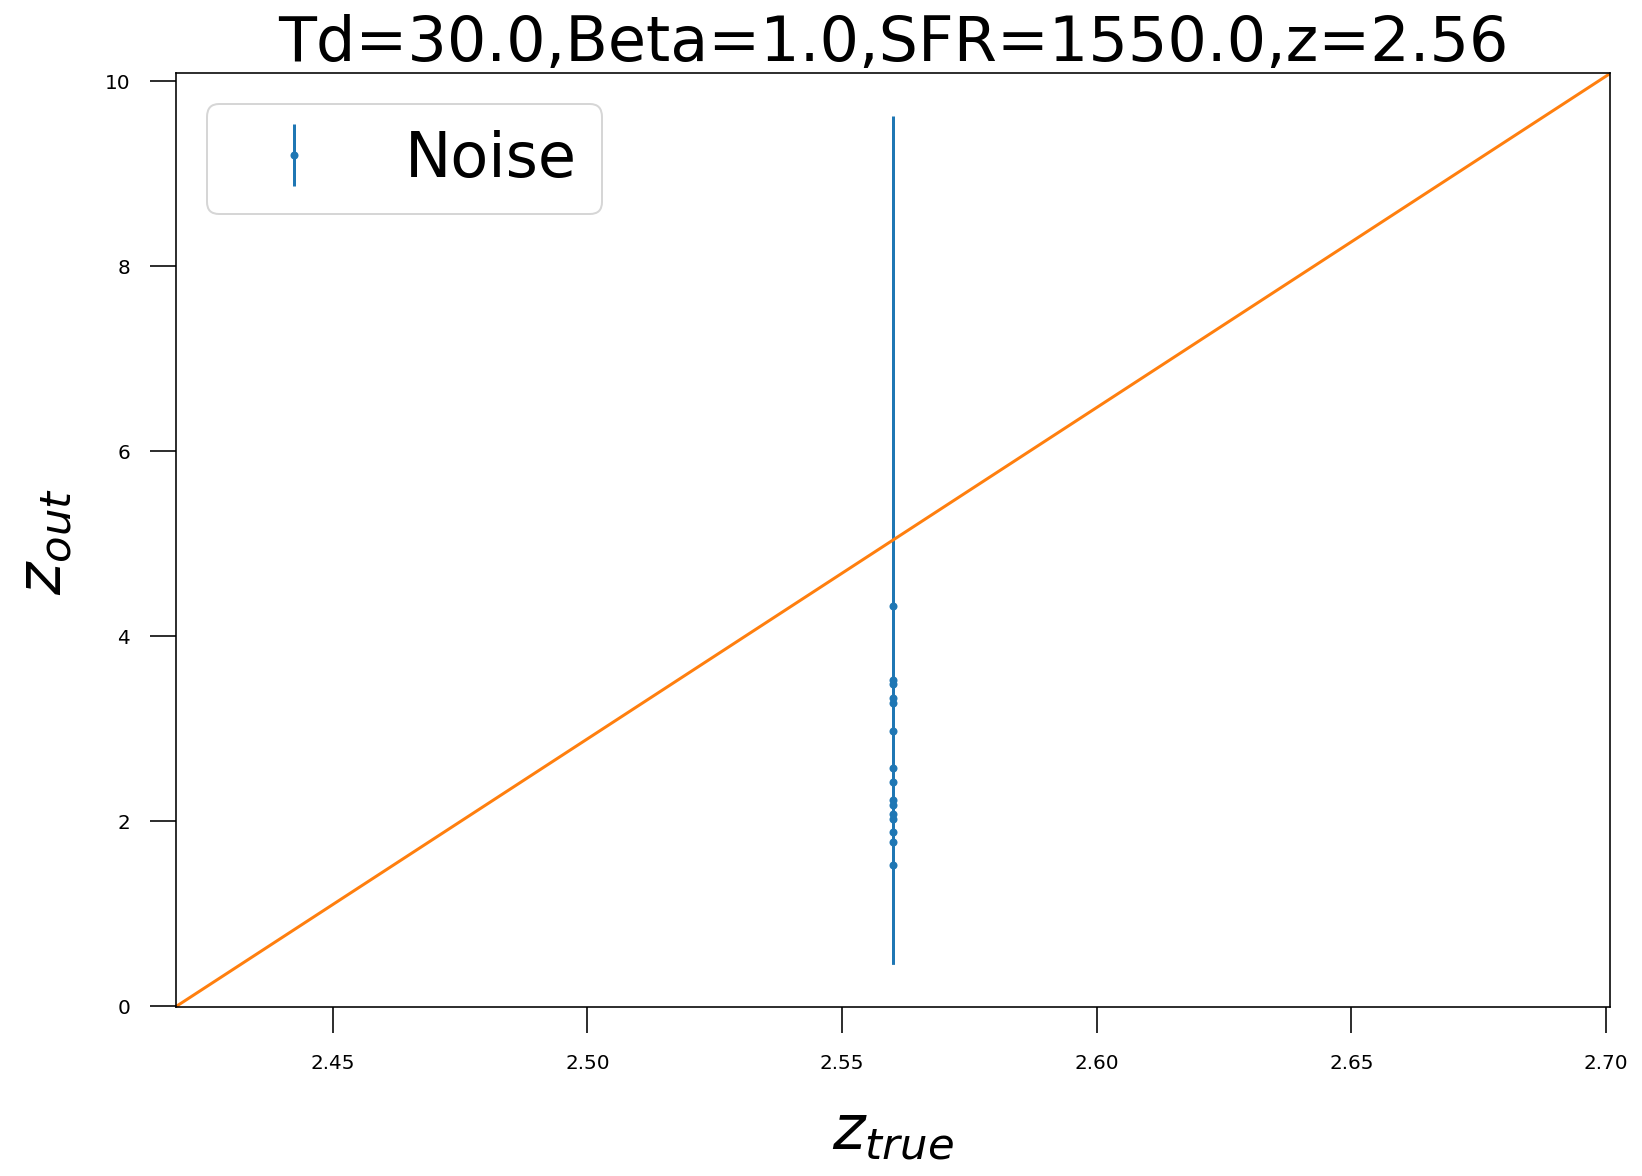

In [83]:
fig= plt.figure()
fig, axes = plt.subplots(nrows=1, ncols=1)
plt.subplots_adjust(left=0.15, right=0.98, top=0.98, bottom=0.17)
fig.set_size_inches(12, 8)

axes.tick_params(which='minor', length=8)
axes.tick_params(which='major', length=13)
axes.tick_params(axis='x', pad=10)
axes.tick_params(axis='y', pad=10)

#axes.set_xlim(0.5, 5.0E3)
#axes.set_ylim(6.E-1,50.)
#plt.xscale("log")
#plt.yscale("log")
axes.set_xlabel(r'$z_{true}$', fontsize=31, labelpad=15)
axes.set_ylabel(r'$z_{out}$', fontsize=31, labelpad=15)

#plt.plot(z_save,z_out,'.',label='Noise')
#plt.plot(z_save,z_nonoiseout,'.',label='No noise')
plt.errorbar(z_save,  z_out,yerr=[CI_lower,CI_upper],fmt='.',label='Noise')
#plt.errorbar(z_save,  z_nonoiseout,yerr=[CI_nonoiselower,CI_nonoiseupper],fmt='.',label='No noise')
plt.legend(fontsize=31)
axes.plot([0, 1], [0, 1], transform=axes.transAxes)
plt.title(save_name[0],fontsize=31)

In [62]:
print(z_out)

[4.325 3.475 3.525 3.325 3.275 2.575 2.975 2.225 2.175 2.075 2.425 1.875
 1.775 2.025 1.525]


In [63]:
print(z_save)

[2.56, 2.56, 2.56, 2.56, 2.56, 2.56, 2.56, 2.56, 2.56, 2.56, 2.56, 2.56, 2.56, 2.56, 2.56]


(array([2., 3., 2., 2., 0., 1., 3., 1., 0., 1.]),
 array([1.525, 1.805, 2.085, 2.365, 2.645, 2.925, 3.205, 3.485, 3.765,
        4.045, 4.325]),
 <a list of 10 Patch objects>)

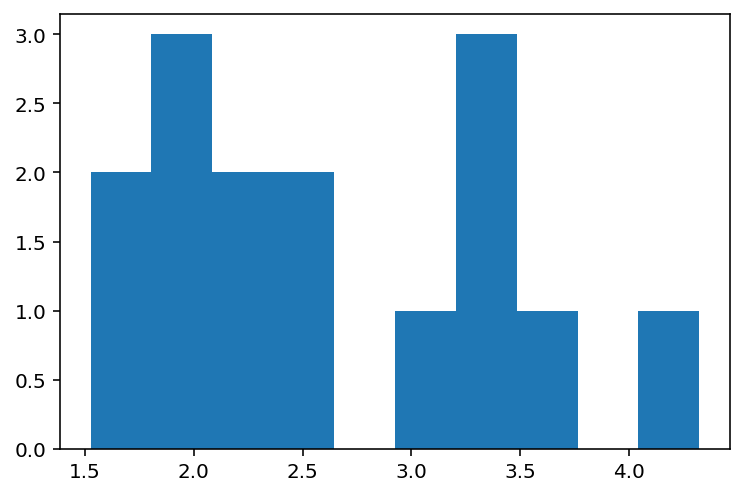

In [64]:
plt.hist(z_out)

Text(0, 0.5, 'z_diff')

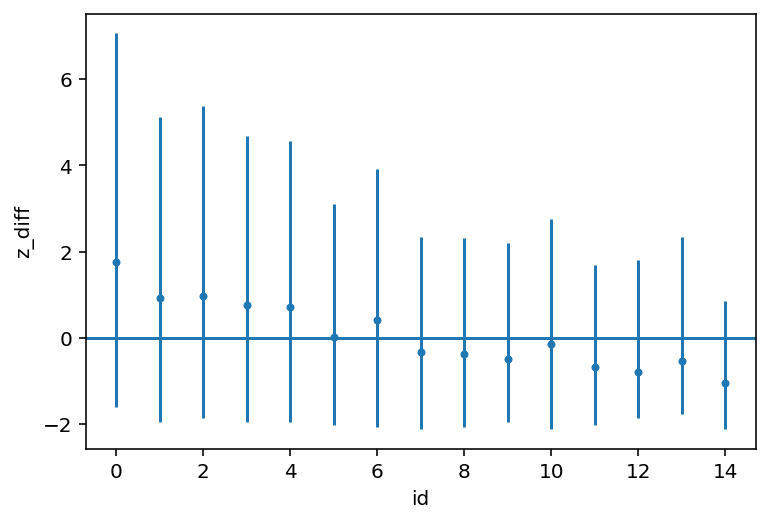

In [80]:
plt.errorbar(range(0,len(z_save)),  z_out-2.56,yerr=[CI_lower,CI_upper],fmt='.',label='Noise')
plt.axhline(y=0)
plt.xlabel('id')
plt.ylabel('z_diff')

Text(0, 0.5, 'z_diff')

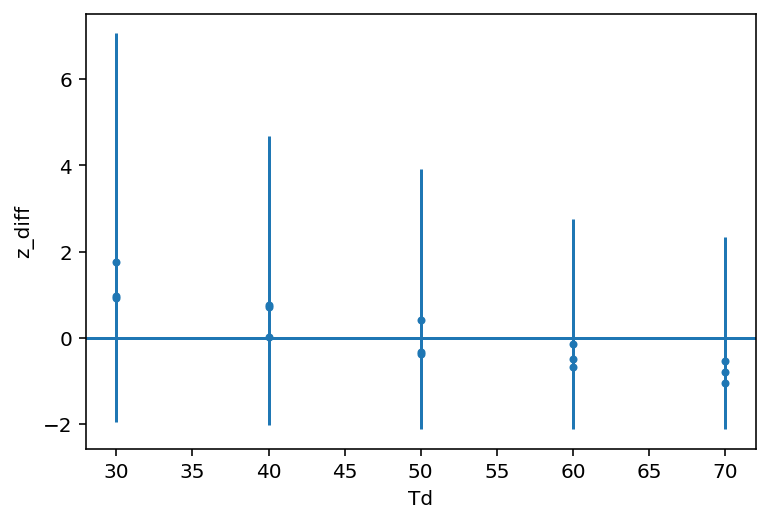

In [81]:
plt.errorbar(Td_save,  z_out-2.56,yerr=[CI_lower,CI_upper],fmt='.',label='Noise')
plt.axhline(y=0)
plt.xlabel('Td')
plt.ylabel('z_diff')

Text(0, 0.5, 'z_diff')

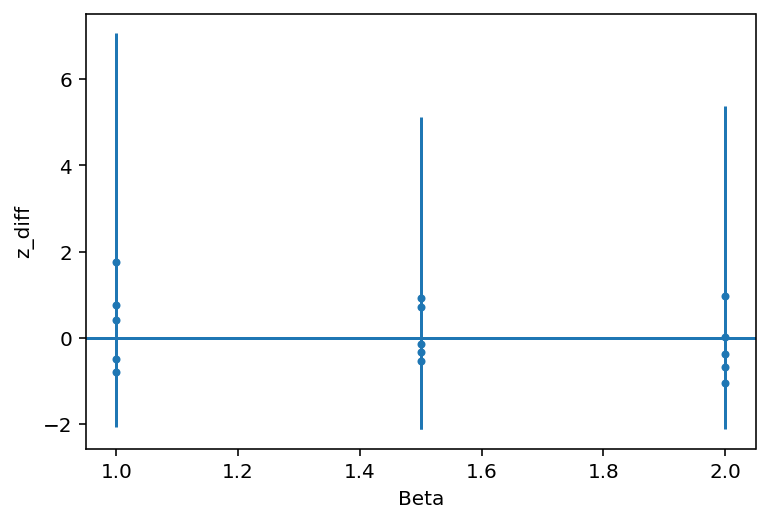

In [82]:
plt.errorbar(B_save,  z_out-2.56,yerr=[CI_lower,CI_upper],fmt='.',label='Noise')
plt.axhline(y=0)
plt.xlabel('Beta')
plt.ylabel('z_diff')